# Question 1

In [30]:
import pandas as pd


url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

users = pd.read_csv(url, delimiter='|')


print(user_data.head())

   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213


In [28]:
mean_age_per_occupation = users.groupby('occupation')['age'].mean()

print(mean_age_per_occupation)

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [56]:
def gender_to_numeric(x):
    if x == 'M':
        return 1
    if x == 'F':
        return 0

users['gender_n'] = users['gender'].apply(gender_to_numeric)

male_ratio = users.groupby('occupation')['gender_n'].mean().sort_values(ascending=False)

print(male_ratio)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender_n, dtype: float64


In [31]:
min_max_age = users.groupby('occupation')['age'].agg(['min', 'max'])

print(min_max_age)

               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [32]:
mean_age_per_occupation_sex = users.groupby(['occupation', 'gender'])['age'].mean()

print(mean_age_per_occupation_sex)

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [35]:
gender_count = users.groupby(['occupation', 'gender']).size().unstack().fillna(0)
gender_percentage = gender_count.div(gender_count.sum(axis=1), axis=0) * 100

print(gender_percentage)

gender                 F           M
occupation                          
administrator  45.569620   54.430380
artist         46.428571   53.571429
doctor          0.000000  100.000000
educator       27.368421   72.631579
engineer        2.985075   97.014925
entertainment  11.111111   88.888889
executive       9.375000   90.625000
healthcare     68.750000   31.250000
homemaker      85.714286   14.285714
lawyer         16.666667   83.333333
librarian      56.862745   43.137255
marketing      38.461538   61.538462
none           44.444444   55.555556
other          34.285714   65.714286
programmer      9.090909   90.909091
retired         7.142857   92.857143
salesman       25.000000   75.000000
scientist       9.677419   90.322581
student        30.612245   69.387755
technician      3.703704   96.296296
writer         42.222222   57.777778


# Question 2

In [36]:
import pandas as pd

euro12_url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(euro12_url)

print(euro12.head())


             Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
0         Croatia      4               13                12             51.9%   
1  Czech Republic      4               13                18             41.9%   
2         Denmark      4               10                10             50.0%   
3         England      5               11                18             50.0%   
4          France      3               22                24             37.9%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
0            16.0%                          32             0              0   
1            12.9%                          39             0              0   
2            20.0%                          27             1              0   
3            17.2%                          40             0              0   
4             6.5%                          65             1              0   

   Penalties not scored  ...  Saves ma

In [38]:
print(euro12['Goals'])

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


In [40]:
num_teams = euro12['Team'].nunique()

print(f"Number of teams that participated in the Euro 2012 was: {num_teams}")

Number of teams that participated in the Euro 2012 was: 16


In [41]:
num_columns = euro12.shape[1]

print(f"Number of columns in the dataset is: {num_columns}")

Number of columns in the dataset is: 35


In [42]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

print(discipline.head())

             Team  Yellow Cards  Red Cards
0         Croatia             9          0
1  Czech Republic             7          0
2         Denmark             4          0
3         England             5          0
4          France             6          0


In [43]:
discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[False, False])

print(discipline_sorted)

                   Team  Yellow Cards  Red Cards
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
7                 Italy            16          0
10             Portugal            12          0
13                Spain            11          0
0               Croatia             9          0
1        Czech Republic             7          0
14               Sweden             7          0
4                France             6          0
12               Russia             6          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
2               Denmark             4          0
5               Germany             4          0


In [44]:
mean_yellow_cards = euro12['Yellow Cards'].mean()

print(f"The mean number of yellow cards given per team is: {mean_yellow_cards}")

The mean number of yellow cards given per team is: 7.4375


In [49]:
teams_more_6_goals = euro12[euro12['Goals'] > 6][['Team','Goals']]

print(teams_more_6_goals)

       Team  Goals
5   Germany     10
13    Spain     12


In [51]:
teams_starting_with_g = euro12[euro12['Team'].str.startswith('G')]['Team']

print(teams_starting_with_g)

5    Germany
6     Greece
Name: Team, dtype: object


In [52]:
first_7_columns = euro12.iloc[:, :7]

print(first_7_columns.head())

             Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
0         Croatia      4               13                12             51.9%   
1  Czech Republic      4               13                18             41.9%   
2         Denmark      4               10                10             50.0%   
3         England      5               11                18             50.0%   
4          France      3               22                24             37.9%   

  % Goals-to-shots  Total shots (inc. Blocked)  
0            16.0%                          32  
1            12.9%                          39  
2            20.0%                          27  
3            17.2%                          40  
4             6.5%                          65  


In [53]:
all_but_last_3_columns = euro12.iloc[:, :-3]

print(all_but_last_3_columns.head())

             Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
0         Croatia      4               13                12             51.9%   
1  Czech Republic      4               13                18             41.9%   
2         Denmark      4               10                10             50.0%   
3         England      5               11                18             50.0%   
4          France      3               22                24             37.9%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
0            16.0%                          32             0              0   
1            12.9%                          39             0              0   
2            20.0%                          27             1              0   
3            17.2%                          40             0              0   
4             6.5%                          65             1              0   

   Penalties not scored  ...  Clean Sh

In [54]:
shooting_accuracy = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]

print(shooting_accuracy)

       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


# Question 3

In [57]:
import pandas as pd
import numpy as np

series1 = pd.Series(np.random.randint(1, 5, size=100))

series2 = pd.Series(np.random.randint(1, 4, size=100))

series3 = pd.Series(np.random.randint(10000, 30001, size=100))

# Displaying the first few elements of each series
print("First Series:")
print(series1.head())
print("\nSecond Series:")
print(series2.head())
print("\nThird Series:")
print(series3.head())


First Series:
0    3
1    1
2    2
3    2
4    2
dtype: int32

Second Series:
0    3
1    3
2    2
3    1
4    3
dtype: int32

Third Series:
0    10530
1    18547
2    15082
3    27685
4    10043
dtype: int32


In [59]:
df = pd.DataFrame({'Series1': series1, 'Series2': series2, 'Series3': series3})
print(df.head())

   Series1  Series2  Series3
0        3        3    10530
1        1        3    18547
2        2        2    15082
3        2        1    27685
4        2        3    10043


In [60]:
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

print(df.head())

   bedrs  bathrs  price_sqr_meter
0      3       3            10530
1      1       3            18547
2      2       2            15082
3      2       1            27685
4      2       3            10043


In [63]:
bigcolumn = pd.concat([series1, series2, series3], axis=0).to_frame(name='bigcolumn')

#Reindexing 0-299
bigcolumn.reset_index(drop=True, inplace=True)

print(bigcolumn.index)



RangeIndex(start=0, stop=300, step=1)


# Question 4

In [64]:
data = pd.read_csv('C:/Users/joshc/Desktop/Problem Set 3/wind.txt', delim_whitespace=True, parse_dates={'date': [0, 1, 2]})
data.set_index('date', inplace=True)

data.head()


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71


In [72]:
data.index = data.index - pd.DateOffset(years=38)
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
2023-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
2023-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2023-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71


In [73]:
data.index = pd.to_datetime(data.index)

In [74]:
missing_values_count = data.isnull().sum()

print(missing_values_count)

RPT    0
VAL    1
ROS    0
KIL    0
SHA    1
BIR    0
DUB    0
CLA    1
MUL    0
CLO    0
BEL    0
MAL    0
dtype: int64


In [75]:
total_non_missing_values = data.count().sum()

print("Total non-missing values:", total_non_missing_values)

Total non-missing values: 33


In [76]:
mean_windspeed = data.mean().mean()

print("Mean windspeed:", mean_windspeed)

Mean windspeed: 12.053333333333333


In [77]:
loc_stats = data.agg(['min', 'max', 'mean', 'std'])
loc_stats = loc_stats.T
loc_stats.columns = ['Min', 'Max', 'Mean', 'Std']

print(loc_stats)

       Min    Max       Mean       Std
RPT  14.71  18.50  16.083333  2.099389
VAL  14.96  16.88  15.920000  1.357645
ROS  10.83  13.17  12.110000  1.185411
KIL   6.50  10.13   8.640000  1.900289
SHA  11.17  12.62  11.895000  1.025305
BIR   6.17   9.87   7.903333  1.861003
DUB  11.25  13.67  12.140000  1.330902
CLA  10.04  10.25  10.145000  0.148492
MUL   8.50  10.83   9.706667  1.167233
CLO   7.67  12.58   9.973333  2.469015
BEL  12.75  18.50  16.263333  3.080265
MAL  12.71  15.04  13.860000  1.165290


In [78]:
day_stats = data.agg(['min', 'max', 'mean', 'std'], axis=1)
day_stats.columns = ['Min', 'Max', 'Mean', 'Std']

print(day_stats)

             Min    Max       Mean       Std
date                                        
2023-01-01  9.29  18.50  13.018182  2.808875
2023-01-02  6.50  17.54  11.336364  3.188994
2023-01-03  6.17  18.50  11.641818  3.681912


In [79]:
january_avg = data[data.index.month == 1].mean()

print("Average windspeed in January for each location:")
print(january_avg)


Average windspeed in January for each location:
RPT    16.083333
VAL    15.920000
ROS    12.110000
KIL     8.640000
SHA    11.895000
BIR     7.903333
DUB    12.140000
CLA    10.145000
MUL     9.706667
CLO     9.973333
BEL    16.263333
MAL    13.860000
dtype: float64


In [80]:
yearly_data = data.resample('Y').mean()

print(yearly_data)

                  RPT    VAL    ROS   KIL     SHA       BIR    DUB     CLA  \
date                                                                         
2023-12-31  16.083333  15.92  12.11  8.64  11.895  7.903333  12.14  10.145   

                 MUL       CLO        BEL    MAL  
date                                              
2023-12-31  9.706667  9.973333  16.263333  13.86  


In [81]:
monthly_data = data.resample('M').mean()

print(monthly_data)

                  RPT    VAL    ROS   KIL     SHA       BIR    DUB     CLA  \
date                                                                         
2023-01-31  16.083333  15.92  12.11  8.64  11.895  7.903333  12.14  10.145   

                 MUL       CLO        BEL    MAL  
date                                              
2023-01-31  9.706667  9.973333  16.263333  13.86  


In [82]:
weekly_data = data.resample('W').mean()

print(weekly_data)

               RPT    VAL    ROS    KIL     SHA   BIR     DUB    CLA     MUL  \
date                                                                           
2023-01-01  15.040  14.96  13.17  9.290     NaN  9.87  13.670  10.25  10.830   
2023-01-08  16.605  16.88  11.58  8.315  11.895  6.92  11.375  10.04   9.145   

              CLO     BEL    MAL  
date                              
2023-01-01  12.58  18.500  15.04  
2023-01-08   8.67  15.145  13.27  


In [85]:
filtered_data = data['1961-01-02':'1962-01-01']

weekly_data = filtered_data.resample('W-MON').agg(['min', 'max', 'mean', 'std'])

print(weekly_data.head(52))

# Why????

Empty DataFrame
Columns: [(RPT, min), (RPT, max), (RPT, mean), (RPT, std), (VAL, min), (VAL, max), (VAL, mean), (VAL, std), (ROS, min), (ROS, max), (ROS, mean), (ROS, std), (KIL, min), (KIL, max), (KIL, mean), (KIL, std), (SHA, min), (SHA, max), (SHA, mean), (SHA, std), (BIR, min), (BIR, max), (BIR, mean), (BIR, std), (DUB, min), (DUB, max), (DUB, mean), (DUB, std), (CLA, min), (CLA, max), (CLA, mean), (CLA, std), (MUL, min), (MUL, max), (MUL, mean), (MUL, std), (CLO, min), (CLO, max), (CLO, mean), (CLO, std), (BEL, min), (BEL, max), (BEL, mean), (BEL, std), (MAL, min), (MAL, max), (MAL, mean), (MAL, std)]
Index: []

[0 rows x 48 columns]


# Question 5

In [86]:
import pandas as pd

chipo_url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

chipo = pd.read_csv(chipo_url, delimiter='\t')

chipo.head(10)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [90]:
num_rows = chipo.shape[0]
num_columns = chipo.shape[1]

print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)


Number of Rows: 4622
Number of Columns: 5


In [91]:
print("Column Names:")
for column in chipo.columns:
    print(column)

Column Names:
order_id
quantity
item_name
choice_description
item_price


In [92]:
index_info = chipo.index

print("Index Information:")
print(index_info)

Index Information:
RangeIndex(start=0, stop=4622, step=1)


In [94]:
item_orders = chipo.groupby('item_name')['quantity'].sum()

most_ordered_item = item_orders.idxmax()
most_ordered_quantity = item_orders.max()

print("The item ordered the most:", most_ordered_item)
print("Number of times ordered:", most_ordered_quantity)


The item ordered the most: Chicken Bowl
Number of times ordered: 761


In [95]:
choice_orders = chipo.groupby('choice_description')['quantity'].sum()

most_ordered_choice = choice_orders.idxmax()
most_ordered_choice_quantity = choice_orders.max()

print("The choice description ordered the most:", most_ordered_choice)
print("Number of times ordered:", most_ordered_choice_quantity)


The choice description ordered the most: [Diet Coke]
Number of times ordered: 159


In [97]:
chipo['revenue'] = chipo['item_price'] * chipo['quantity']
total_revenue = chipo['revenue'].sum()

print("Total Revenue:", total_revenue)


Total Revenue: 39237.02


In [99]:
num_orders = chipo['order_id'].nunique()

print("Number of Orders Made:", num_orders)


Number of Orders Made: 1834


In [100]:
average_revenue_per_order = total_revenue / num_orders
print("Average Revenue Amount per Order:", average_revenue_per_order)


Average Revenue Amount per Order: 21.39423118865867


In [101]:
num_different_items = chipo['item_name'].nunique()

print("Number of Different Items Sold:", num_different_items)


Number of Different Items Sold: 50


# Question 6 - Marriage and Divorce Pt1

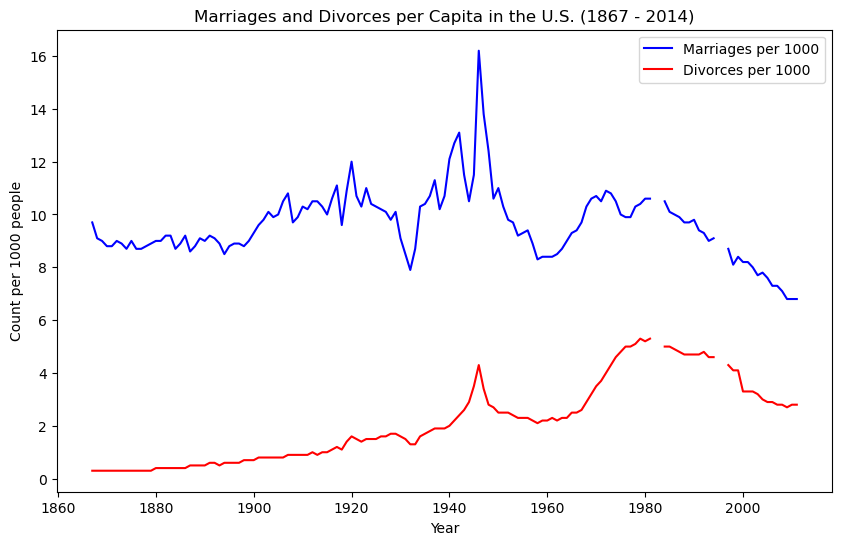

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

file_name = 'us-marriages-divorces-1867-2014.csv'
data = pd.read_csv(file_name)

# Creating a line plot
plt.figure(figsize=(10,6)) 

# Plotting Marriages per 1000
plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per 1000', color='blue')

# Plotting Divorces per 1000
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per 1000', color='red')

# Adding labels and title to the plot
plt.xlabel('Year')  
plt.ylabel('Count per 1000 people')
plt.title('Marriages and Divorces per Capita in the U.S. (1867 - 2014)')

# Displaying the legend 
plt.legend()

plt.show()


# Question 7 - Marriage and Divorce Pt2

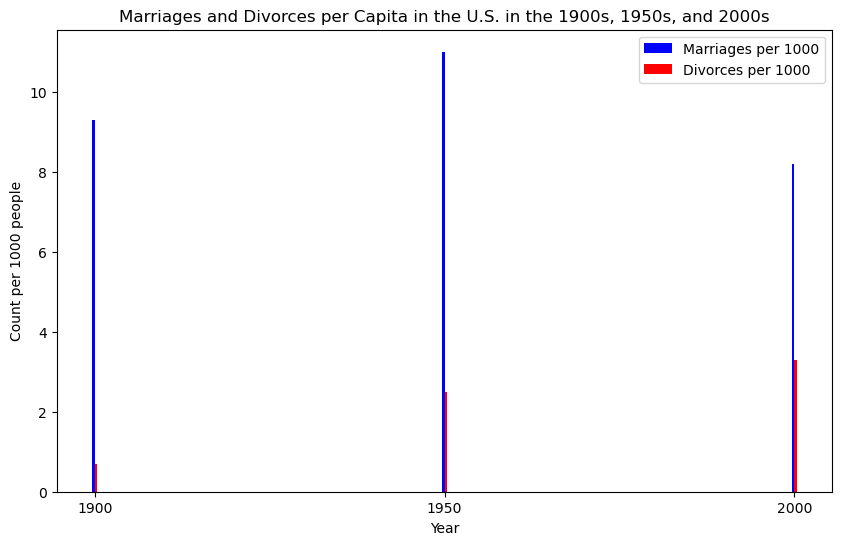

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

file_name = 'us-marriages-divorces-1867-2014.csv'
data = pd.read_csv(file_name)

# Filtering the data for specific years
years_of_interest = [1900, 1950, 2000]
filtered_data = data[data['Year'].isin(years_of_interest)]

# Creating a vertical bar chart
plt.figure(figsize=(10,6)) 

# Bar width
bar_width = 0.35
index = filtered_data['Year'] 

# Plotting Marriages per 1000
plt.bar(index, filtered_data['Marriages_per_1000'], bar_width, label='Marriages per 1000', color='blue')

# Plotting Divorces per 1000
plt.bar(index + bar_width, filtered_data['Divorces_per_1000'], bar_width, label='Divorces per 1000', color='red')

# Adding labels and title
plt.xlabel('Year') 
plt.ylabel('Count per 1000 people') 
plt.title('Marriages and Divorces per Capita in the U.S. in the 1900s, 1950s, and 2000s') 

# Setting the position of the labels
plt.xticks(index + bar_width / 2, years_of_interest)

# Displaying the legend
plt.legend()

plt.show()



# Question 8 - Deadliest actors

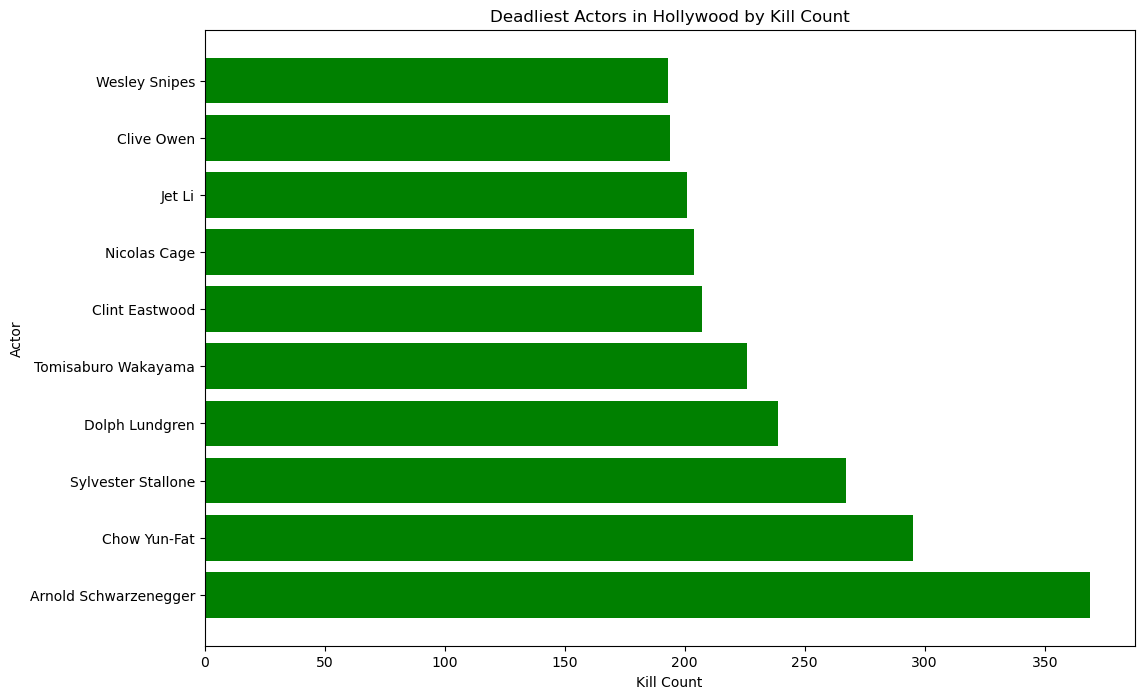

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

file_name = 'actor_kill_counts.csv'
kill_data = pd.read_csv(file_name)

# Sorting the data
sorted_kill_data = kill_data.sort_values('Count', ascending=False)

# Creating a horizontal bar chart
plt.figure(figsize=(12,8))  # Set the size of the plot

# Plotting the data
plt.barh(sorted_kill_data['Actor'], sorted_kill_data['Count'], color='green')

# Adding labels and title
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood by Kill Count')

plt.show()



# Question 9 - Assassinated Roman Emperors

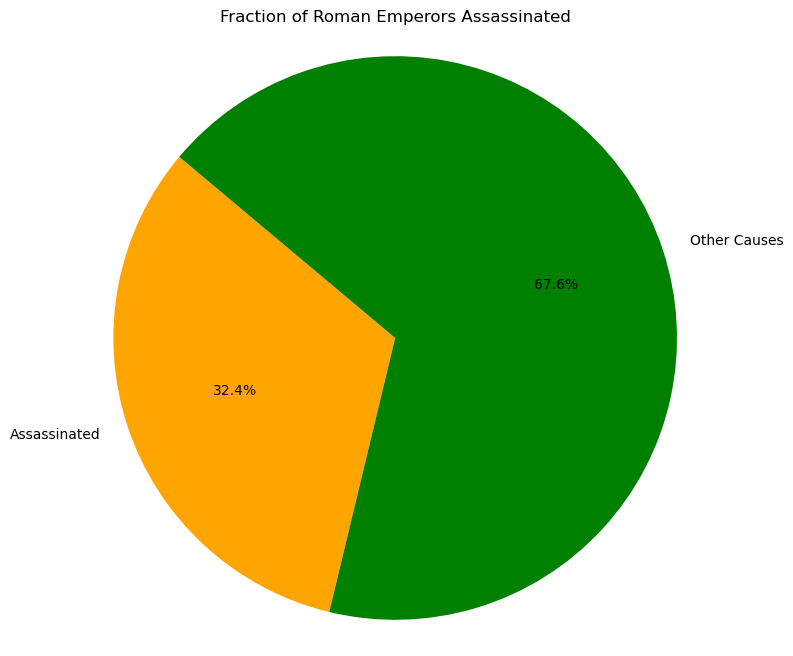

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

file_name = 'roman-emperor-reigns.csv'
emperor_data = pd.read_csv(file_name)

# Counting who were assassinated
assassination_count = emperor_data['Cause_of_Death'].value_counts()['Assassinated']
total_emperors = len(emperor_data)

# Calculating the fractions
fraction_assassinated = assassination_count / total_emperors
fraction_not_assassinated = 1 - fraction_assassinated

# Labels for the chart
labels = ['Assassinated', 'Other Causes']

# Sizes for each section
sizes = [fraction_assassinated, fraction_not_assassinated]

# Color
colors = ['orange', 'green']

# Creating the pie chart
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

plt.axis('equal')

# Adding a title to the pie chart
plt.title('Fraction of Roman Emperors Assassinated')

plt.show()



# Question 10 - Revenue Earned

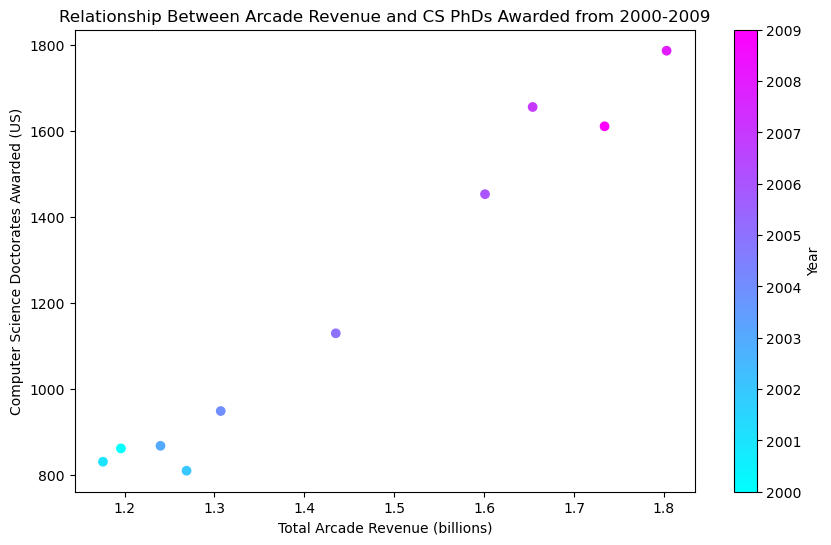

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

file_name = 'arcade-revenue-vs-cs-doctorates.csv'
revenue_phd_data = pd.read_csv(file_name)

# Creating the scatter plot
plt.figure(figsize=(10, 6))

# Plotting the data
plt.scatter(revenue_phd_data['Total Arcade Revenue (billions)'], 
            revenue_phd_data['Computer Science Doctorates Awarded (US)'],
            c=revenue_phd_data['Year'], cmap='cool')

# Adding a color bar to indicate the years
plt.colorbar(label='Year')

# Adding labels and a title to the plot
plt.xlabel('Total Arcade Revenue (billions)') 
plt.ylabel('Computer Science Doctorates Awarded (US)') 
plt.title('Relationship Between Arcade Revenue and CS PhDs Awarded from 2000-2009')

plt.show()


# END